# SLU16 - Data Sufficiency and Selection


In [1]:
import math
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from hashlib import sha1 # just for grading purposes
import json # just for grading purposes

def _hash(obj):
    if type(obj) is not str:
        obj = json.dumps(obj)
    return sha1(obj.encode()).hexdigest()

%matplotlib inline

In [2]:
# load up a classification dataset

X = pd.read_csv('data/exercise_X.csv')
y = pd.read_csv('data/exercise_y.csv')['label']
# give X a quick look
X.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,id
0,0.788678,-2.468043,-2.403158,0.084746,-1.390815,-0.497524,-0.283922,-2.472916,Meerkat,0
1,1.360423,-0.918873,0.880275,-0.646257,0.087879,0.069273,-1.083448,-0.183893,Meerkat,1
2,1.329499,-0.608535,-1.169760,0.517516,-1.630975,-1.046952,0.923580,-0.332124,Meerkat,2
3,-0.525361,-0.827992,-0.620789,-0.152414,-0.287303,1.846636,-0.676444,0.211721,Meerkat,3
4,-0.158881,-1.094734,0.184125,-0.610730,0.073603,0.250729,-1.503690,0.612917,Meerkat,4


In [3]:
# looks like a balanced binary target
y.value_counts()

1    500
0    500
Name: label, dtype: int64

# Find the first obviously useless feature

Can you determine which of the features contains all uniques and therefore cannot have any predictive power?

In [6]:
# Use this cell to determine which of the features serves as a categorical
# feature and contains all uniques
X['id'].nunique()

1000

In [4]:
# set the variable feature_all_unique to the name of the feature
# that contains all uniques
feature_all_unique = 'id'

# YOUR CODE HERE

In [5]:
### BEGIN TESTS
assert _hash(feature_all_unique) == '87ea5dfc8b8e384d848979496e706390b497e547'
### END TESTS

# Find the second obviously useless feature

This one doesn't contain all uniques but based upon some Single Factor Analysis you should be able to determine which feature isn't worth
bothering with.

In [20]:
# use this cell to do some more SFA on other features to determine
# which of them is useless
X['feature_8'].value_counts()

Meerkat     999
Squirrel      1
Name: feature_8, dtype: int64

In [21]:
# Use this cell to determine the other obviously useless feature
other_useless_feature = 'feature_8'

# YOUR CODE HERE

In [22]:
### BEGIN TESTS
assert _hash(other_useless_feature) == '04c03b252faf210d252b1d80590911758427b048'
### END TESTS

In [27]:
# now drop the features that you determined to be useless and store them in X_1

X_1 = X.drop(columns=['id','feature_8'])

# YOUR CODE HERE

In [28]:
### BEGIN TESTS
assert _hash(list(sorted(X_1.columns))) == '7c9a6ed68a038fdcf0722571cbc6a60ed958d19b'
### END TESTS

# Find the rest of the useless features

Single Factor Analysis isn't likely to do much in helping us to determine
which of the rest of the features are useless. We'll need to some `feature_importances` in order to find the rest of these bad boys

In [37]:
# Now let's import and train the classifier and get the feature importance using
# the X_1 DataFrame

# First import a decision tree

from sklearn.ensemble import RandomForestClassifier

# Create your classifier, assign it to the clf variable and then
# train it on X_1 and y
clf = RandomForestClassifier(max_depth=5,random_state = 1)
clf.fit(X_1,y)

# once the classifier is trained, set the feature importances here
# make it a pandas series with the index being the column names
# so that we can visualize the results
feature_importances =  pd.Series(clf.feature_importances_, index=X_1.columns)
# set the random_state=1 and max_depth=5 or the tests won't pass!
# YOUR CODE HERE

C:\Users\Francisco\Anaconda3\envs\slu15\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [38]:
### BEGIN TESTS
assert hasattr(clf, 'feature_importances_'), 'The classifier must be a tree based classifier'
assert clf.random_state == 1, 'random_state must be 1'
assert clf.max_depth == 5, 'max_depth must be 5'
assert np.isclose(feature_importances['feature_0'], 0.031820, atol=1e-5), 'feature 0 importance seems off'
assert np.isclose(feature_importances['feature_1'], 0.128733, atol=1e-5), 'feature 1 importance seems off'
assert np.isclose(feature_importances['feature_6'], 0.146977, atol=1e-5), 'feature 6 importance seems off'
### END TESTS

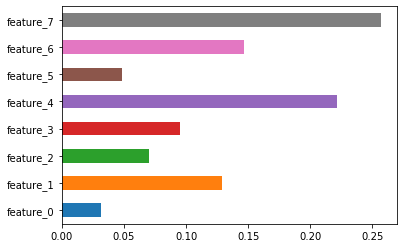

In [39]:
feature_importances.plot.barh();

In [60]:
# Now let's import and train the classifier and get the feature importance using
# the X_1 DataFrame

# First import a LogisticRegression

from sklearn.linear_model import LogisticRegression

# YOUR CODE HERE

# Create your classifier, assign it to the clf variable and then
# train it on X_1 and y
clf = LogisticRegression(solver='lbfgs',random_state=1)
clf.fit(X_1,y)
# once the classifier is trained, set the coefs_ here
# make it a pandas series with the index being the column names
# so that we can visualize the results
# BE SURE to take the absolute value of the coefs
abs_coefs = pd.Series(np.abs(clf.coef_[0]),index=X_1.columns)

# set the solver='lbfgs' and random_state=1 or the tests won't pass!
# YOUR CODE HER

In [61]:
### BEGIN TESTS
assert isinstance(clf, LogisticRegression), 'The classifier must be a logistic regression'
assert clf.random_state == 1, 'random_state must be 1'
assert clf.solver == 'lbfgs', 'solver must be lbfgs'
assert np.isclose(abs_coefs['feature_0'], 0.031889, atol=1e-5), 'feature 0 coef seems off'
assert np.isclose(abs_coefs['feature_1'], 0.093313, atol=1e-5), 'feature 1 coef seems off'
assert np.isclose(abs_coefs['feature_6'], 0.405876, atol=1e-5), 'feature 6 coef seems off'
### END TESTS

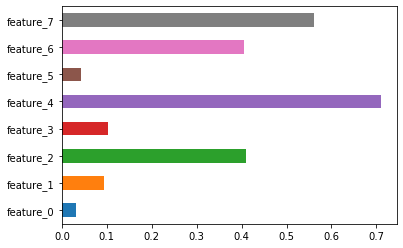

In [62]:
abs_coefs.plot.barh();

In [67]:
# now remove the 3 remaining useless features and store them in
# the variable X_2

X_2 = X_1.drop(columns=['feature_0','feature_1','feature_5'])
X_2
# YOUR CODE HERE

,feature_2,feature_3,feature_4,feature_6,feature_7
0,-2.403158,0.084746,-1.390815,-0.283922,-2.472916
1,0.880275,-0.646257,0.087879,-1.083448,-0.183893
2,-1.169760,0.517516,-1.630975,0.923580,-0.332124
3,-0.620789,-0.152414,-0.287303,-0.676444,0.211721
4,0.184125,-0.610730,0.073603,-1.503690,0.612917
5,0.292050,-0.876738,-0.289014,-1.519450,-1.870177
6,-2.284104,0.533661,-2.114950,0.518704,-0.533329
7,0.329223,-1.379431,1.173500,-3.668009,1.919143
8,-0.948869,-0.412314,-1.221521,-1.391928,0.424512
9,-2.240432,1.564841,1.483846,2.769395,-1.430648


In [68]:
### BEGIN TESTS
assert _hash(list(sorted(X_2.columns))) == '0ba088ebdcf2b8598c95a2a89cf140b86ec1d6d5'
### END TESTS

# Correlations

Determine the correlations between each of the features and the target column.

In [69]:
X = pd.read_csv('data/exercise_X.csv')
y = pd.read_csv('data/exercise_y.csv')['label']

In [78]:
# In this cell, compute the absolute value of the correlations between each feature and the target and store it in
# a variable called abs_corrs
x_corr = X.copy()
x_corr['y']=y
abs_corrs=x_corr.corr()['y']
# YOUR CODE HERE
abs_corrs = np.abs(abs_corrs.drop(index=['y','id']))

In [79]:
### BEGIN TESTS
expected_features = {
    'feature_0', 
    'feature_1', 
    'feature_2', 
    'feature_3', 
    'feature_4',
    'feature_5',
    'feature_6',
    'feature_7',
}
assert set(abs_corrs.index) == expected_features, 'you should only have expected_features features'
assert np.isclose(abs_corrs['feature_0'], 0.027928, rtol=1e-04)
assert np.isclose(abs_corrs['feature_5'], 0.008327, rtol=1e-04)
assert np.isclose(abs_corrs['feature_7'], 0.285048, rtol=1e-04)
### END TESTS

# The learning curve

Okay now that we have gotten rid of all those useless features, let's focus on getting a sense for how much data we need in order to have
reasonable performance.

In [ ]:
from utils import plot_learning_curve

In [108]:
# Now create a dataframe that has a single feature that is the
# cross validation score in order to help us understand
# how increasing amounts of data affect the performance

# HINT: just use the snippet from the Learning Notebook


# instantiate a classifier that you will inspect the learning rate of
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5, random_state=1)
train_sizes, train_scores, test_scores = learning_curve(clf, X_2, y)
train_scores_mean =  np.mean(train_scores,axis=1)
test_scores_mean = np.mean(test_scores,axis=1)
# IMPORTANT: Be sure to train on X_2

# YOUR CODE HERE

C:\Users\Francisco\Anaconda3\envs\slu15\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [109]:
### BEGIN TESTS
# round in order to compensate for implementation details

assert math.isclose(sum(train_scores_mean), 4.5, rel_tol=1e-2)
assert math.isclose(sum(test_scores_mean), 3.8, rel_tol=1e-2)
### END TESTS

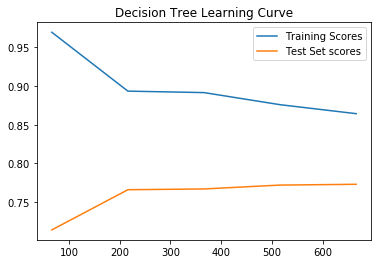

In [110]:
learning_curve_df = pd.DataFrame({
    'Training Scores': train_scores_mean,
    'Test Set scores': test_scores_mean
}, index=train_sizes)

learning_curve_df.plot.line(
    title='Decision Tree Learning Curve'
);

In [ ]:
# Now select the minimum training set size that this particular classifier
# seems to need before it's learning rate stabilizes

min_train_set_size = None

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
### BEGIN TESTS
assert _hash(min_train_set_size) == 'ba30fd97b4127db56e9f4d3d9c030d71646fd2e7'
### END TESTS